In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [119]:
# reading data

train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")

In [120]:
# Inital Exploration of data and cleaning
pd.set_option('display.max_columns', 100)
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,

In [121]:
# 81 columns haha

train.info()

# there are some missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [122]:
# Histograms

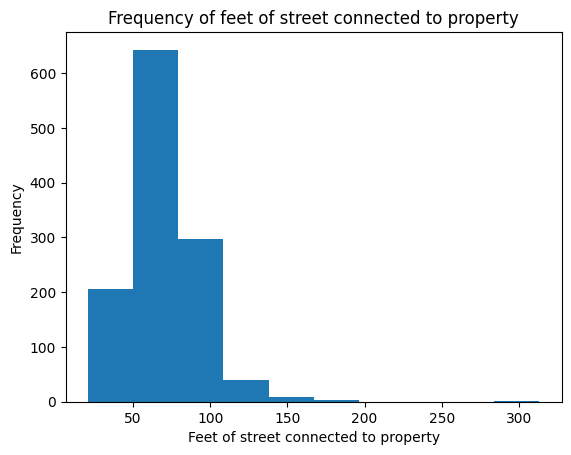

In [123]:
plt.hist(train['LotFrontage']) 

# Add labels and title
plt.xlabel('Feet of street connected to property')
plt.ylabel('Frequency')
plt.title('Frequency of feet of street connected to property')

plt.show()

In [124]:
# filling Lot frontage

train['LotFrontage'].fillna(train['LotFrontage'].median(), inplace=True)
test['LotFrontage'].fillna(test['LotFrontage'].median(), inplace=True)

print(f' Null values {train['LotFrontage'].isnull().sum()}')

 Null values 0


/var/folders/wj/t_hntq2j583ghdyfg17304bm0000gn/T/ipykernel_31950/3136483531.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/wj/t_hntq2j583ghdyfg17304bm0000gn/T/ipykernel_31950/3136483531.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

In [125]:
# since alley column has 94% missing data so we drop it

train.drop('Alley', axis=1, inplace=True)
test.drop('Alley', axis=1, inplace=True)

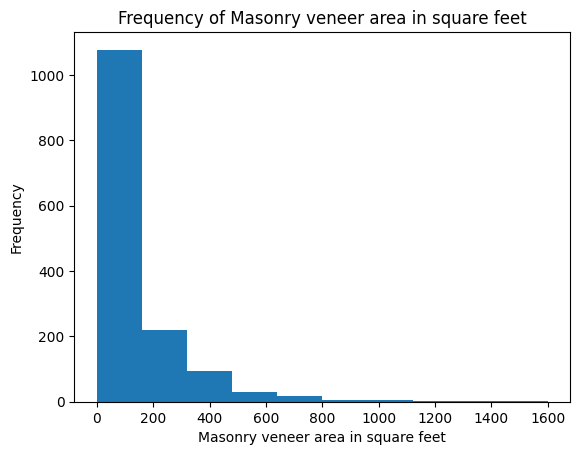

In [126]:
plt.hist(train['MasVnrArea'])

plt.xlabel('Masonry veneer area in square feet')
plt.ylabel('Frequency')
plt.title('Frequency of Masonry veneer area in square feet')

plt.show()

In [127]:
# Filling missing values in MasonryVeneerArea as I assume the empty ones does not have those
MavFea = ['MasVnrArea', 'MasVnrType'] 

train[MavFea] = train[MavFea].fillna('None')
test[MavFea] = test[MavFea].fillna('None')

print(f'Null values \n{train[MavFea].isnull().sum()}')

Null values 
MasVnrArea    0
MasVnrType    0
dtype: int64


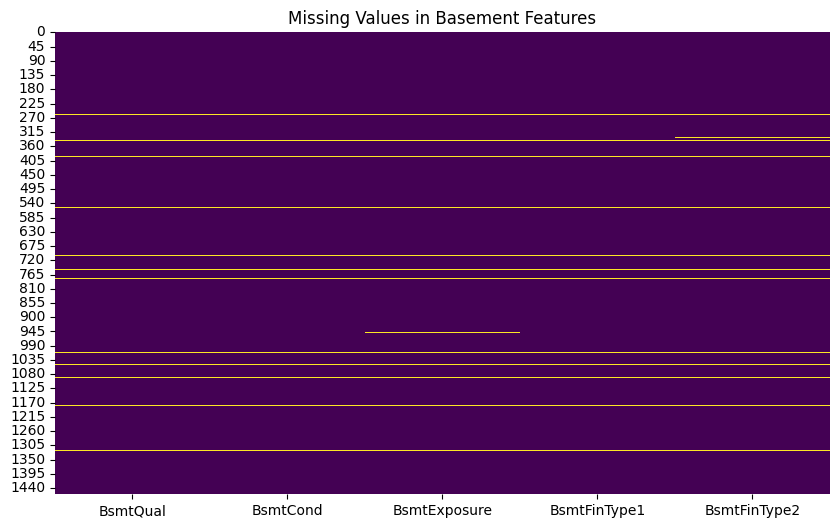

In [128]:
# Select the basement related features

basement_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

# Create a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(train[basement_features].isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Basement Features')

plt.show()

In [129]:
# As you can see most the data does not have built basement there so we will replace it with none to make it simple

train[basement_features] = train[basement_features].fillna('None')
test[basement_features] = test[basement_features].fillna('None')

print(f'Null values \n{train[basement_features].isnull().sum()}')

Null values 
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64


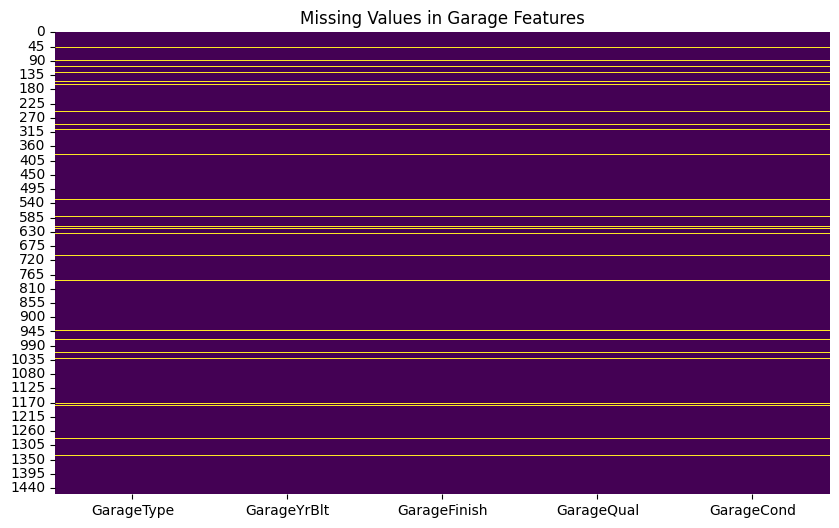

In [130]:
# similarly for various garage features we make a list and heatmap

garage_features = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']

plt.figure(figsize=(10, 6))
sns.heatmap(train[garage_features].isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Garage Features')

plt.show()

In [131]:
# We fill the missing values

fill_values = {
    'GarageType': 'None',
    'GarageFinish': 'None',
    'GarageQual': 'None',
    'GarageCond': 'None',
    'GarageYrBlt': 0 
}

for feature in garage_features:
    train[feature] = train[feature].fillna(fill_values[feature])
    test[feature] = test[feature].fillna(fill_values[feature])


print(f'Null values \n{train[garage_features].isnull().sum()}')

Null values 
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64


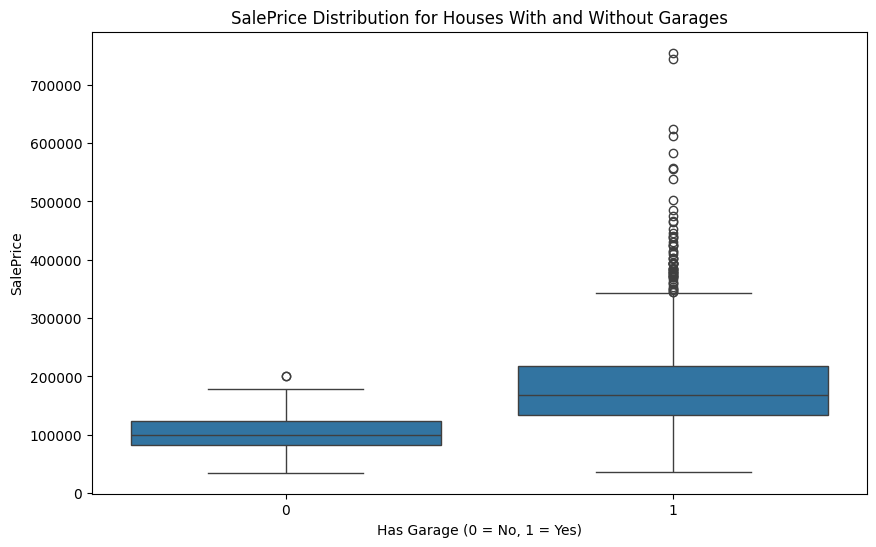

In [132]:
train['HasGarage'] = train['GarageType'].apply(lambda x: 0 if x == 'None' else 1)

plt.figure(figsize=(10, 6))
sns.boxplot(x='HasGarage', y='SalePrice', data=train)
plt.title('SalePrice Distribution for Houses With and Without Garages')
plt.xlabel('Has Garage (0 = No, 1 = Yes)')
plt.ylabel('SalePrice')
plt.show()


In [133]:
# Not so significant and has very less non null values.
features_to_drop = ['PoolQC', 'MiscFeature', 'Fence']

# Drop the features
train = train.drop(columns=features_to_drop)
test = test.drop(columns=features_to_drop)

In [134]:
# Check if houses with 0 fireplaces have missing FireplaceQuality

train[train['Fireplaces'] == 0]['FireplaceQu'].isnull().sum()

# hence it gives clear idea the houses with no fireplace has empty fireplace quality cell.

np.int64(690)

In [135]:
# Fill missing values in FireplaceQu with 'None'

train['FireplaceQu'] = train['FireplaceQu'].fillna('None')
test['FireplaceQu'] = test['FireplaceQu'].fillna('None')

In [136]:
train.info()

# just making sure there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [137]:
# Changing columns to categorical

categorical_columns = categorical_columns = [
    'MSZoning',
    'Street',
    'LotShape',
    'LandContour',
    'Utilities',
    'LotConfig',
    'LandSlope',
    'Neighborhood',
    'Condition1',
    'Condition2',
    'BldgType',
    'HouseStyle',
    'RoofStyle',
    'RoofMatl',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'ExterQual',
    'ExterCond',
    'Foundation',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'Heating',
    'HeatingQC',
    'CentralAir',
    'Electrical',
    'KitchenQual',
    'Functional',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PavedDrive',
    'SaleType',
    'SaleCondition'
]

train[categorical_columns] = train[categorical_columns].astype('category')
test[categorical_columns] = test[categorical_columns].astype('category')

In [138]:
train.dtypes

Id                  int64
MSSubClass          int64
MSZoning         category
LotFrontage       float64
LotArea             int64
                   ...   
YrSold              int64
SaleType         category
SaleCondition    category
SalePrice           int64
HasGarage           int64
Length: 78, dtype: object

In [139]:
# Lets normalize

In [140]:
columns_to_normalize = [
    'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
    'GrLivArea', '1stFlrSF', '2ndFlrSF', 'GarageArea', 
    'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
    '3SsnPorch', 'ScreenPorch', 'PoolArea'
]

scaler = MinMaxScaler()

train[columns_to_normalize] = scaler.fit_transform(train[columns_to_normalize])
test[columns_to_normalize] = scaler.fit_transform(test[columns_to_normalize])


train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasGarage
0,1,60,RL,65.0,0.033420,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,0.125089,Unf,0.00000,0.064212,0.140098,GasA,Ex,Y,SBrkr,0.119780,0.413559,0,0.259231,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,0.386460,TA,TA,Y,0.000000,0.111517,0.000000,0.000000,0.0,0.0,0,2,2008,WD,Normal,208500,1
1,2,20,RL,80.0,0.038795,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,0.173281,Unf,0.00000,0.121575,0.206547,GasA,Ex,Y,SBrkr,0.212942,0.000000,0,0.174830,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,0.324401,TA,TA,Y,0.347725,0.000000,0.000000,0.000000,0.0,0.0,0,5,2007,WD,Normal,181500,1
2,3,60,RL,68.0,0.046507,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,0.086109,Unf,0.00000,0.185788,0.150573,GasA,Ex,Y,SBrkr,0.134465,0.419370,0,0.273549,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,0.428773,TA,TA,Y,0.000000,0.076782,0.000000,0.000000,0.0,0.0,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,0.038561,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,0.038271,Unf,0.00000,0.231164,0.123732,GasA,Gd,Y,SBrkr,0.143873,0.366102,0,0.260550,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,0.452750,TA,TA,Y,0.000000,0.063985,0.492754,0.000000,0.0,0.0,0,2,2006,WD,Abnorml,140000,1
4,5,60,RL,84.0,0.060576,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,0.116052,Unf,0.00000,0.209760,0.187398,GasA,Ex,Y,SBrkr,0.186095,0.509927,0,0.351168,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,0.589563,TA,TA,Y,0.224037,0.153565,0.000000,0.000000,0.0,0.0,0,12,2008,WD,Normal,250000,1
5,6,50,RL,85.0,0.059899,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,0.129695,Unf,0.00000,0.027397,0.130278,GasA,Ex,Y,SBrkr,0.106012,0.274092,0,0.193670,1,0,1,1,1,1,TA,5,Typ,0,None,Attchd,1993.0,Unf,2,0.338505,TA,TA,Y,0.046674,0.054845,0.000000,0.629921,0.0,0.0,700,10,2009,WD,Normal,143000,1
6,7,20,RL,75.0,0.041057,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,0.242558,Unf,0.00000,0.135702,0.275941,GasA,Ex,Y,SBrkr,0.312070,0.000000,0,0.256217,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,0.448519,TA,TA,Y,0.297550,0.104205,0.000000,0.000000,0.0,0.0,0,8,2007,WD,Normal,307000,1
7,8,60,RL,69.0,0.042450,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,0.152197,BLQ,0.02171,0.092466,0.181178,GasA,Ex,Y,SBrkr,0.177375,0.476029,0,0.330821,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,0.341326,TA,TA,Y,0.274212,0.372943,0.413043,0.000000,0.0,0.0,350,11,2009,WD,Normal,200000,1
8,9,50,RM,51.0,0.022529,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,

In [141]:
# we are doing some feature engineering i.e. adding some as we dropped few

In [142]:
# Total area of the house 
train['TotalHouseSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
test['TotalHouseSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

# Age of the house at the time of sale
train['HouseAge'] = train['YrSold'] - train['YearBuilt']
test['HouseAge'] = test['YrSold'] - test['YearBuilt']

# Remodeled age
train['RemodAge'] = train['YrSold'] - train['YearRemodAdd']
test['RemodAge'] = test['YrSold'] - test['YearRemodAdd']

# Total area considering porches and decks
train['TotalOutdoorSF'] = train['WoodDeckSF'] + train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch']
test['TotalOutdoorSF'] = test['WoodDeckSF'] + test['OpenPorchSF'] + test['EnclosedPorch'] + test['3SsnPorch'] + test['ScreenPorch']

print(train[['TotalHouseSF', 'HouseAge', 'RemodAge', 'TotalOutdoorSF']].head())

   TotalHouseSF  HouseAge  RemodAge  TotalOutdoorSF
0      0.673437         5         5        0.111517
1      0.419488        31        31        0.347725
2      0.704409         7         6        0.076782
3      0.633707        91        36        0.556739
4      0.883420         8         8        0.377602


In [143]:
# VISUALIZATIONs

In [144]:
# Create an interactive histogram with a KDE overlay

fig = px.histogram(
    train, 
    x='SalePrice', 
    nbins=30, 
    title='Distribution of SalePrice',
    marginal='violin', 
    color_discrete_sequence=['orange']
)

fig.update_layout(
    xaxis_title='SalePrice',
    yaxis_title='Frequency',
    title_font_size=16,
    xaxis=dict(tickfont=dict(size=14)),
    yaxis=dict(tickfont=dict(size=14))
)
fig.show()

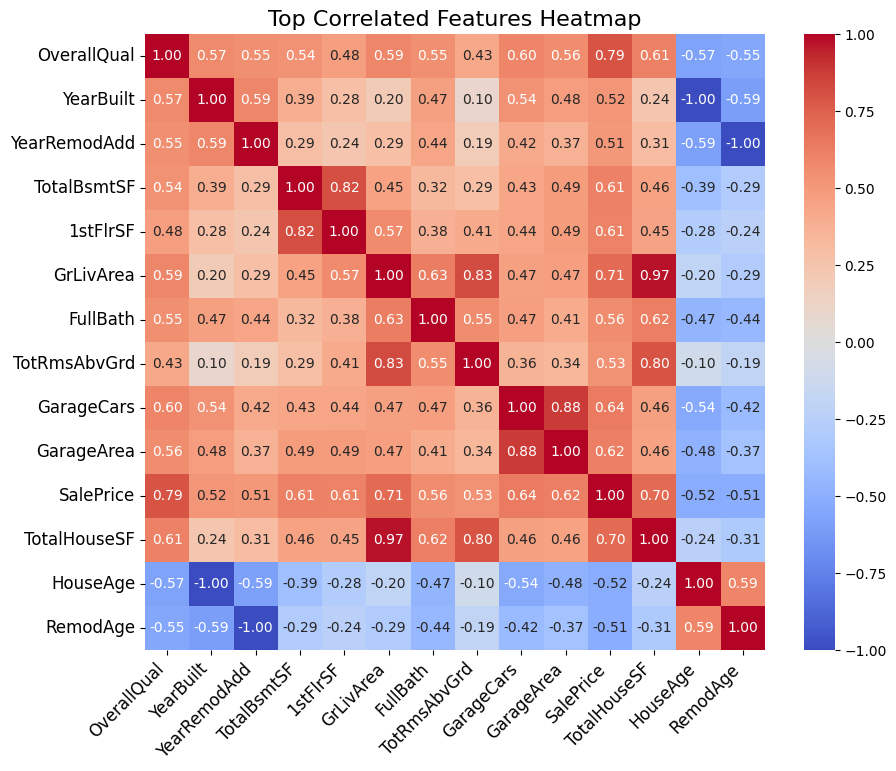

In [145]:
# Correlation heat map
# Only numeric

numeric_cols = train.select_dtypes(include=['number'])
corr_matrix = numeric_cols.corr()
top_corr_features = corr_matrix.index[abs(corr_matrix["SalePrice"]) > 0.5]

plt.figure(figsize=(10, 8))

sns.heatmap(train[top_corr_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

plt.title('Top Correlated Features Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [146]:
# Interesting only very few features have a good linear realtionship with the sales price haahhaha

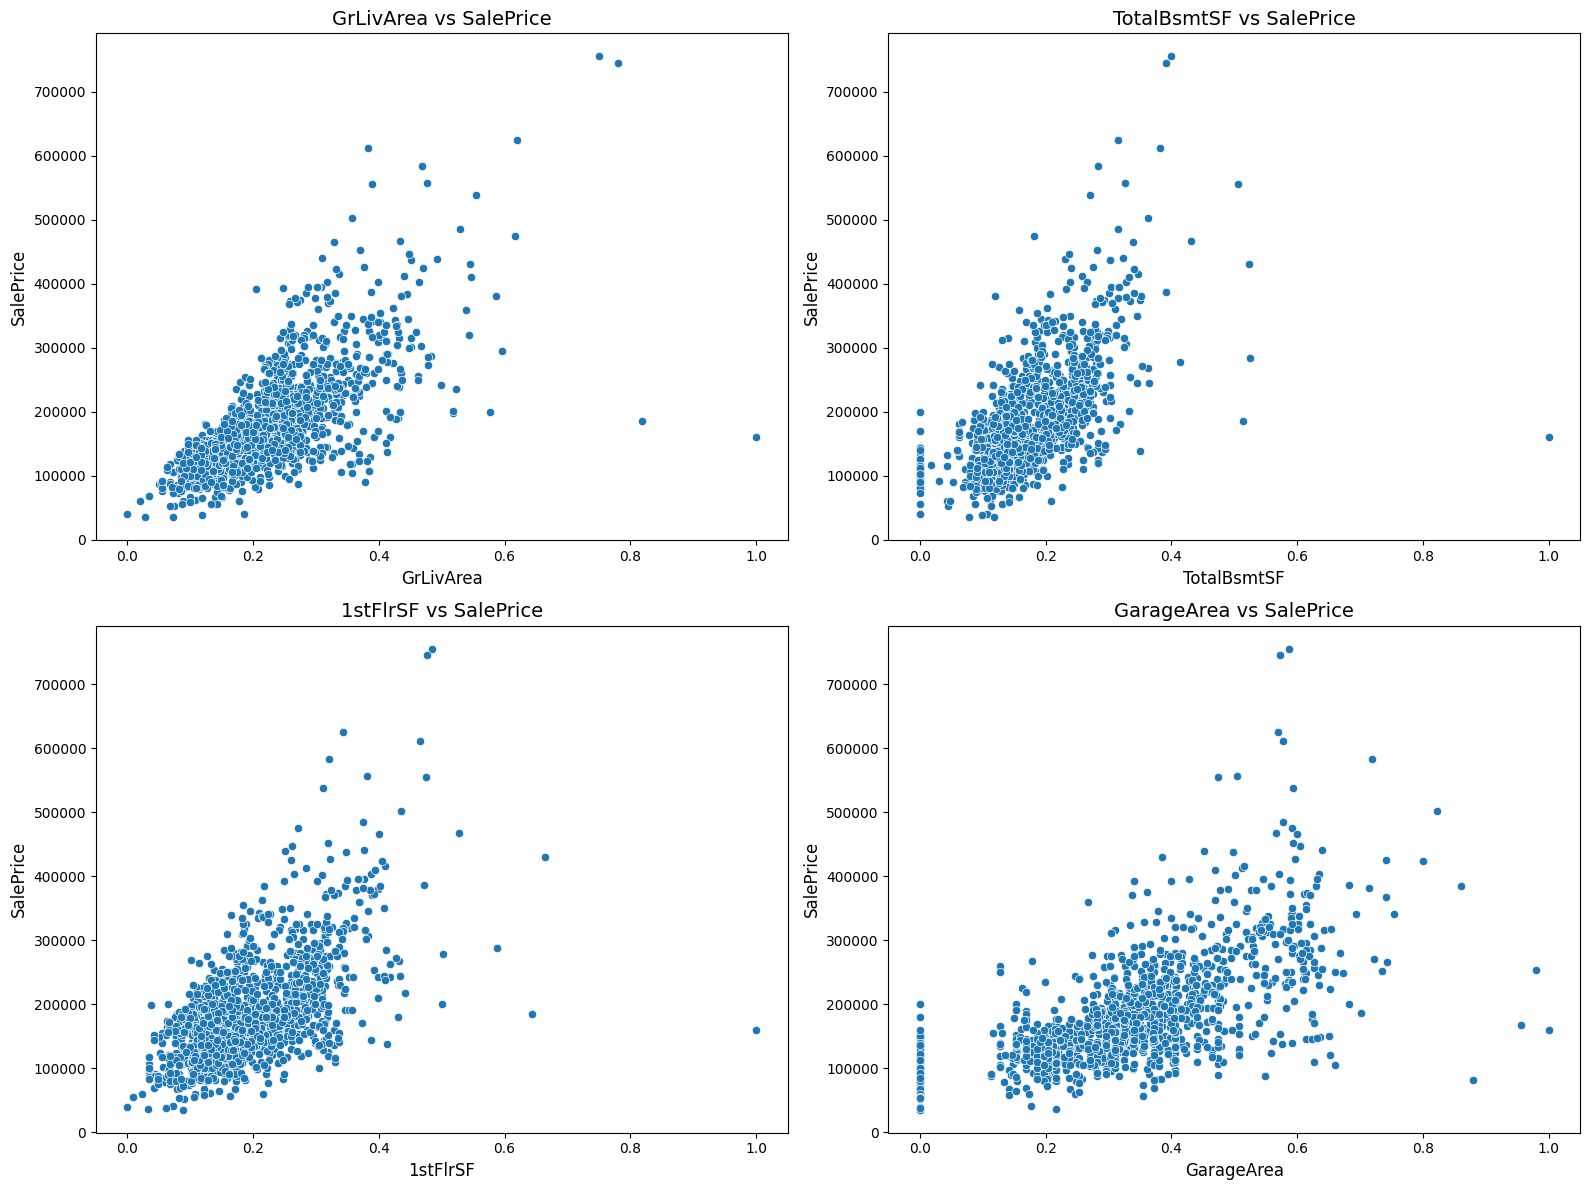

In [147]:
# Lets make some scatter plots

continuous_features = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea']

plt.figure(figsize=(16, 12))

for i, feature in enumerate(continuous_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=train[feature], y=train['SalePrice'])
    plt.title(f'{feature} vs SalePrice', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('SalePrice', fontsize=12)

plt.tight_layout()
plt.show()

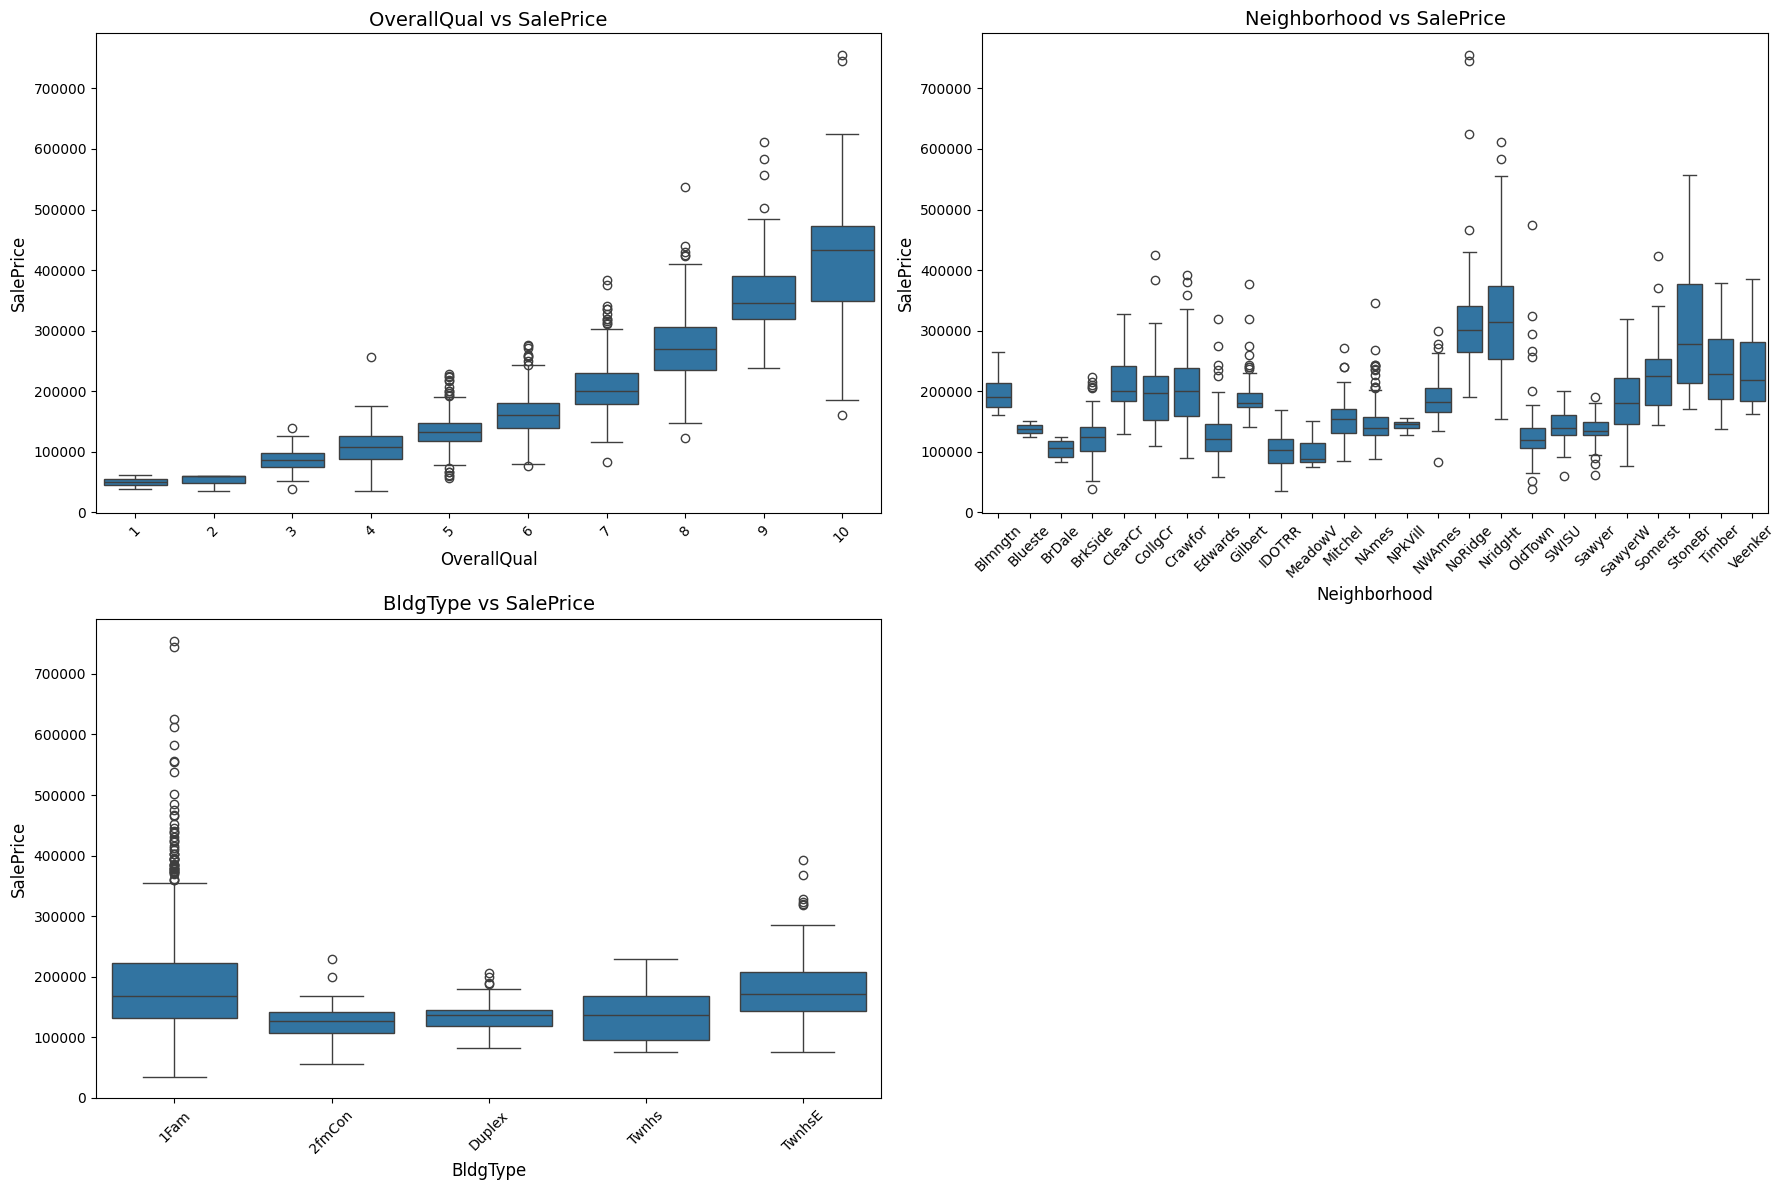

In [148]:
# Box plot for categorical features

categorical_features = ['OverallQual', 'Neighborhood', 'BldgType']

plt.figure(figsize=(18, 12))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=train[feature], y=train['SalePrice'])
    plt.title(f'{feature} vs SalePrice', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('SalePrice', fontsize=12)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


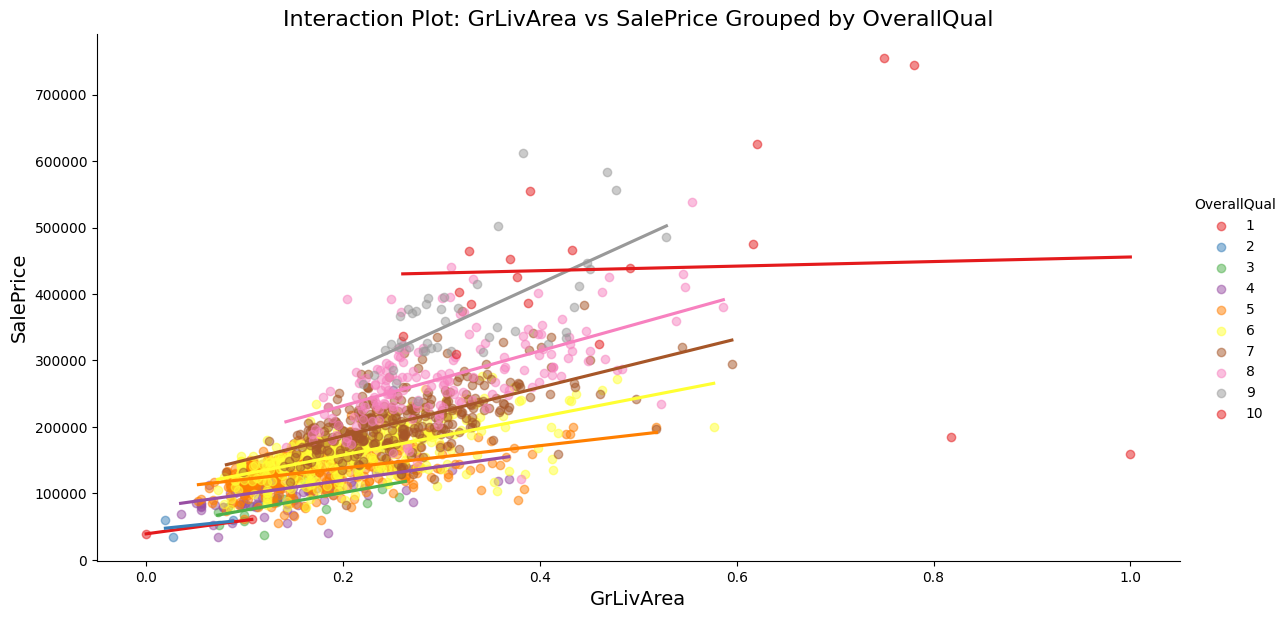

In [149]:
# Interaction plot with above ground living area vs price grouped with overall quality

sns.lmplot(
    x="GrLivArea", 
    y="SalePrice", 
    hue="OverallQual",  
    data=train, 
    aspect=2, 
    height=6, 
    scatter_kws={'alpha':0.5},
    palette="Set1",
    ci=None  
)

plt.title('Interaction Plot: GrLivArea vs SalePrice Grouped by OverallQual', fontsize=16)
plt.xlabel('GrLivArea', fontsize=14)
plt.ylabel('SalePrice', fontsize=14)

# Show the plot
plt.show()


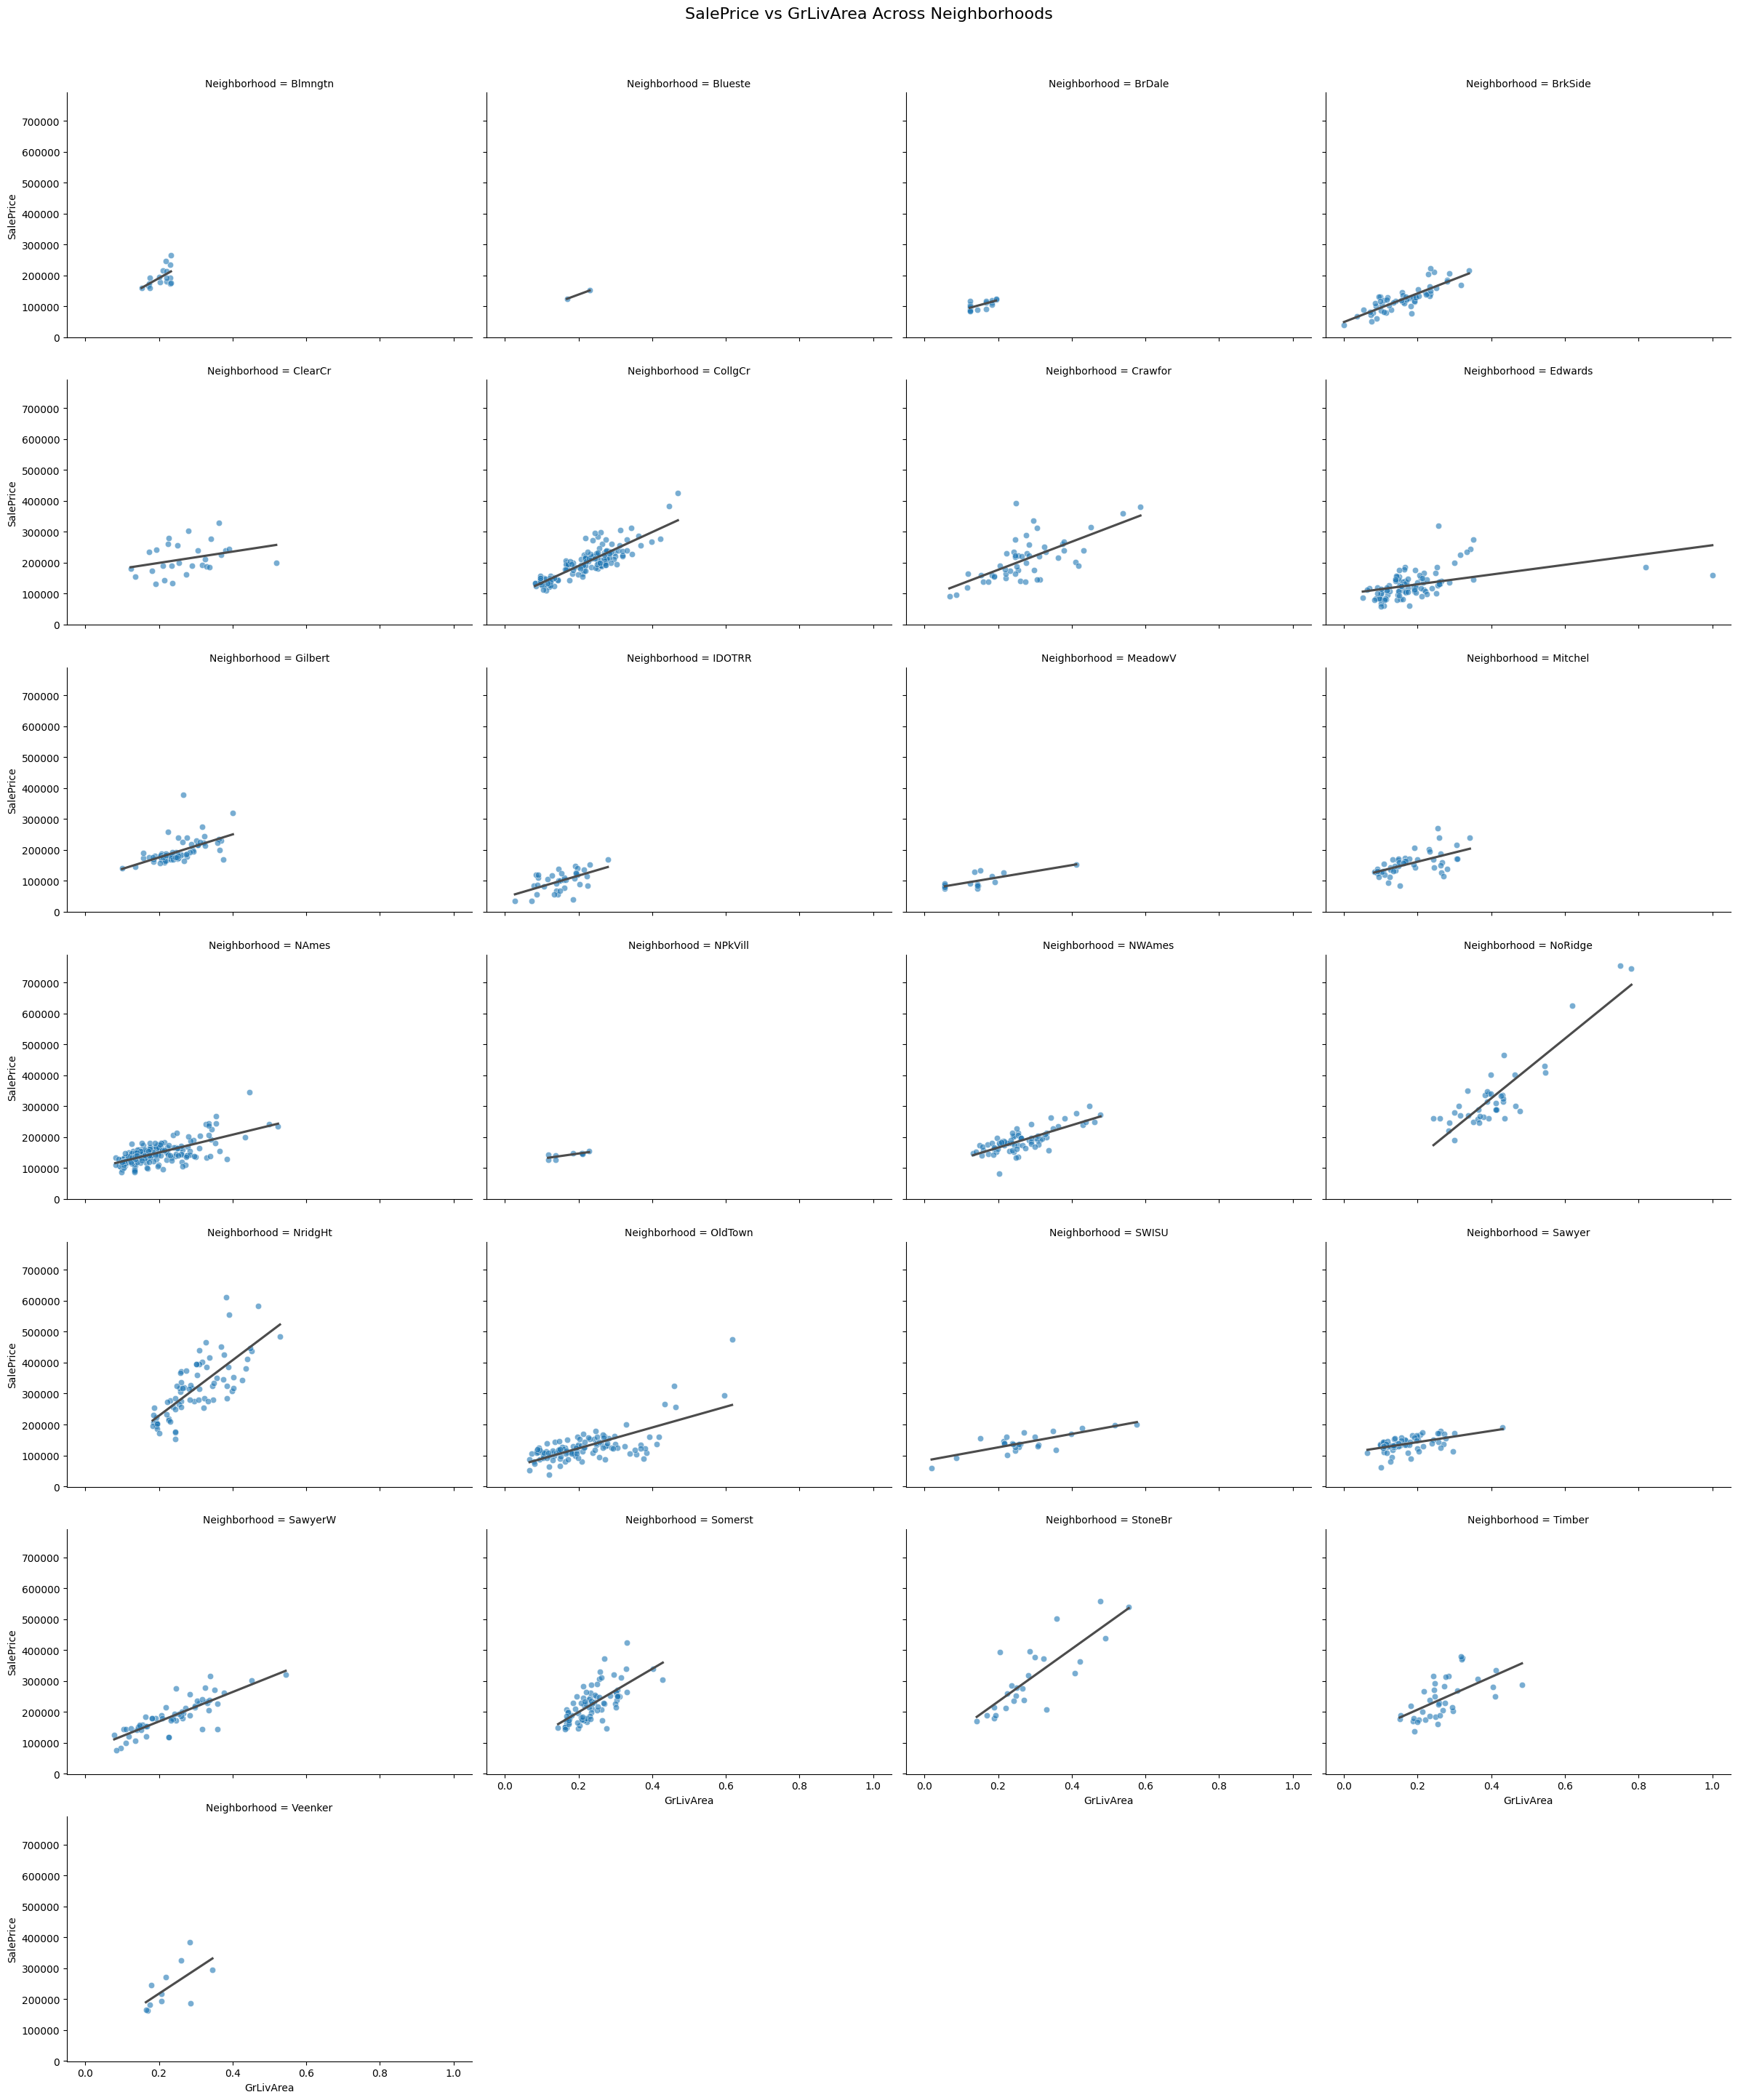

In [150]:
# Facet grid with price vs Living area across different neighbourhoods

facet = sns.FacetGrid(train, col="Neighborhood", col_wrap=4, height=4, aspect=1.5)

facet.map(sns.scatterplot, "GrLivArea", "SalePrice", alpha=0.6)

facet.map(sns.regplot, "GrLivArea", "SalePrice", scatter=False, color=".3", ci=None)

facet.fig.suptitle('SalePrice vs GrLivArea Across Neighborhoods', y=1.03, fontsize=16)
facet.set_axis_labels('GrLivArea', 'SalePrice')


plt.show()

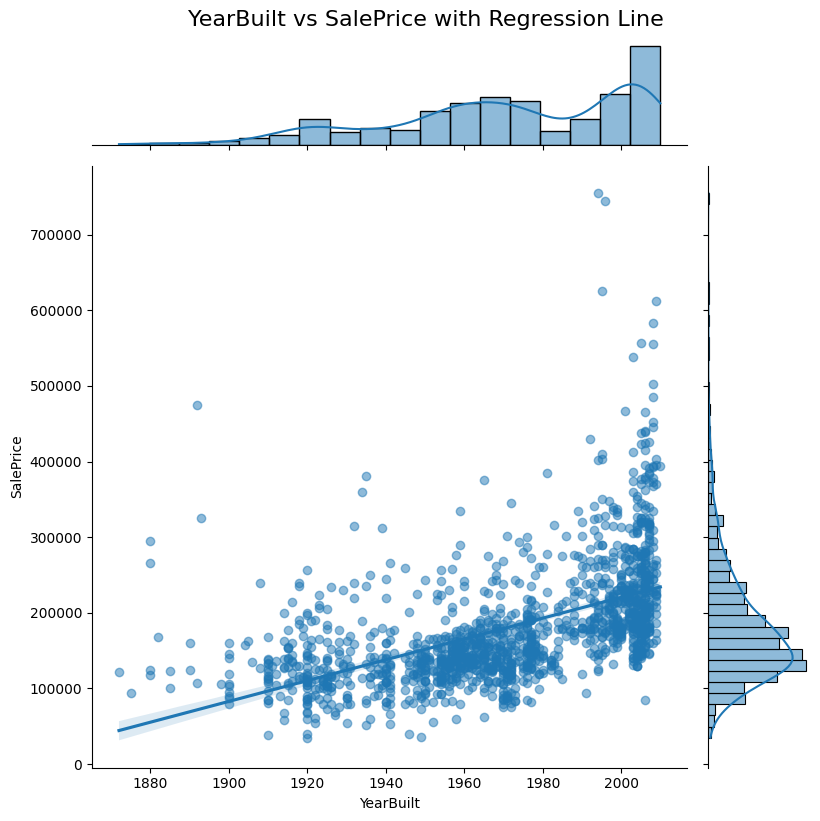

In [151]:
# Scatter plot with regression line for YearBuilt vs SalePrice

sns.jointplot(
    x="YearBuilt", 
    y="SalePrice", 
    data=train, 
    kind="reg", 
    height=8, 
    scatter_kws={'alpha':0.5}  
)

plt.suptitle('YearBuilt vs SalePrice with Regression Line', y=1.02, fontsize=16)

plt.show()

/var/folders/wj/t_hntq2j583ghdyfg17304bm0000gn/T/ipykernel_31950/1614644411.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/wj/t_hntq2j583ghdyfg17304bm0000gn/T/ipykernel_31950/1614644411.py:4: FutureWarning:



The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.



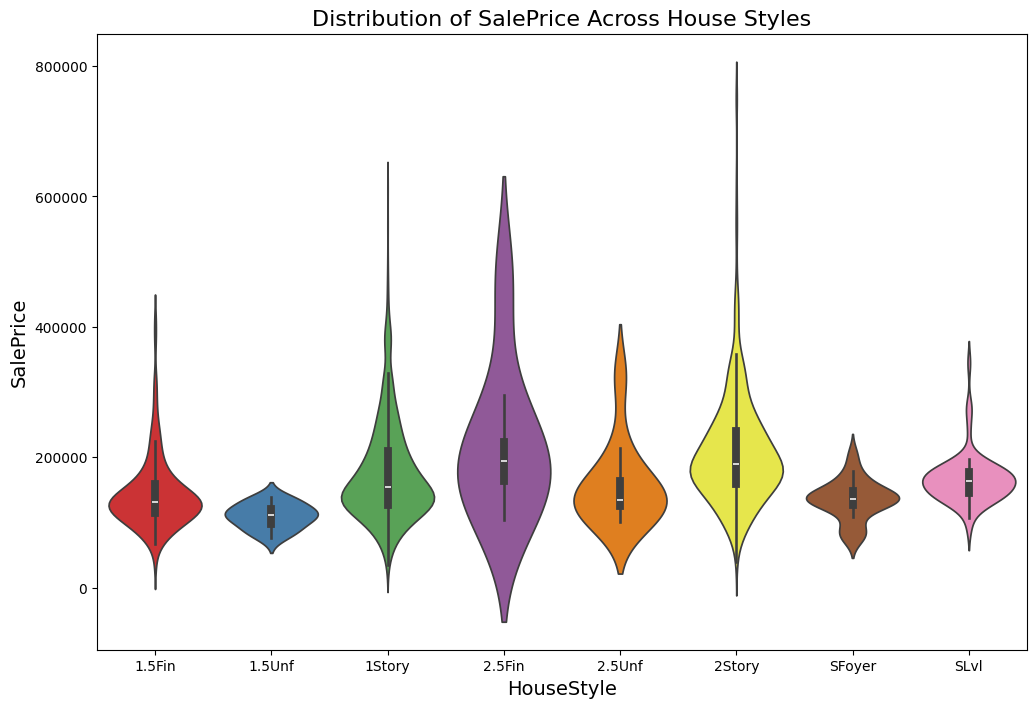

In [152]:
# violin plot for SalePrice across HouseStyle
plt.figure(figsize=(12, 8))

sns.violinplot(
    x='HouseStyle', 
    y='SalePrice', 
    data=train, 
    palette='Set1', 
    inner='box', 
    scale='count' 
)

plt.title('Distribution of SalePrice Across House Styles', fontsize=16)
plt.xlabel('HouseStyle', fontsize=14)
plt.ylabel('SalePrice', fontsize=14)

plt.show()


/var/folders/wj/t_hntq2j583ghdyfg17304bm0000gn/T/ipykernel_31950/55633211.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




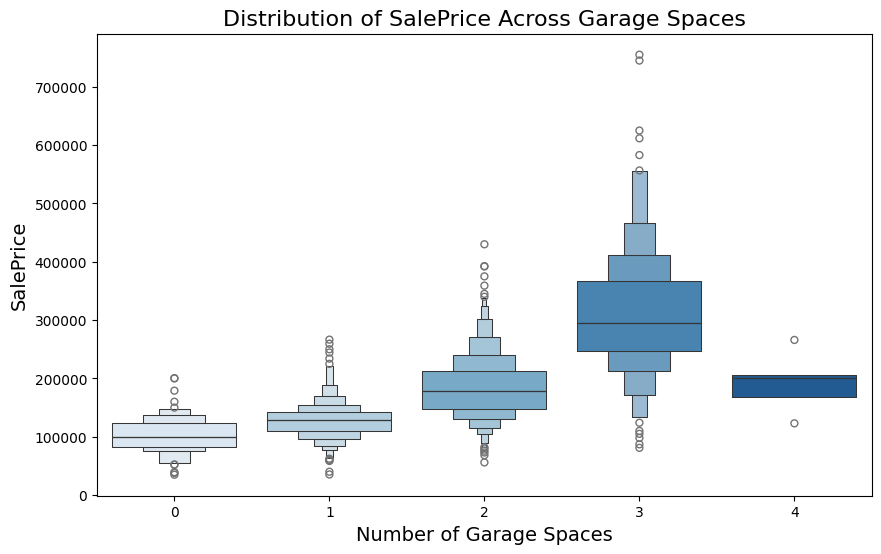

In [153]:
#  Boxen plot for SalePrice across GarageCars

plt.figure(figsize=(10, 6))

sns.boxenplot(
    x='GarageCars', 
    y='SalePrice', 
    data=train, 
    palette='Blues', 
)

plt.title('Distribution of SalePrice Across Garage Spaces', fontsize=16)
plt.xlabel('Number of Garage Spaces', fontsize=14)
plt.ylabel('SalePrice', fontsize=14)

plt.show()

In [156]:
# Model and perdictions

X_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']


# Encode categorical variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(test, drop_first=True)

X_train, X_test = X_train.align(X_test, join='left', axis=1)


# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

test_ids = test['Id']

submission = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': y_pred
})
submission.to_csv('submission.csv', index=False)

print("Predictions saved to submission.csv")

Predictions saved to submission.csv
